In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
test_df = pd.read_csv(r"..\testing\data\test_data_for_graph_mockups.csv")

In [3]:
test_df.head()

,Fiscal Year,HDD,Electricity [kWh],Electricity [MMBTU],Electricity [kW],Electricity Total Cost [$],Electricity Usage Cost [$],Electricity Demand Cost [$],Electricity Energy Cost [$/MMBTU],Oil #1 [gal],...,Oil Cost,Savings over Nat Gas,Savings over Oil,Fuel Switching Savings,Water [gal],Water Cost [$],Sewer [gal],Sewer Cost [$],Total Water Cost [$],Total Unit Cost [$/gal]
0,2016,12017,1466818.911,5004.786125,275.727150,245104.1135,199539.1952,45564.91834,48.973944,46983.000000,...,90518.02727,51415.717810,5080.364063,66133.62662,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,12345,1273106.250,4343.838525,256.558973,227302.3628,187167.4719,40134.89094,52.327535,18317.387390,...,141787.10920,7772.335758,-4059.870058,16644.07814,1746261.290,18736.47258,1746261.290,19351.44097,38087.91355,0.021811
2,2014,12531,1366846.452,4663.680093,249.450437,251364.9614,211858.7255,39506.23589,53.898414,4533.093299,...,202307.39130,-1252.501431,22209.656020,39172.00761,1863525.161,19376.53981,1863525.161,19998.58271,39375.12252,0.021129
3,2013,14939,1395082.298,4760.020802,278.664146,275100.6083,236948.6051,38152.00318,57.793993,4509.852647,...,213022.42090,-724.893912,24403.632110,43406.14804,1849848.571,19739.86743,1849848.571,19848.89029,39588.75771,0.021401
4,2012,13960,1323357.702,4515.296478,265.806284,259947.4733,225250.8562,34696.61715,57.570411,6344.490196,...,212791.19390,-2031.409330,27043.282350,37475.32622,1869442.857,20926.58000,1869442.857,23038.01429,43964.59429,0.023517


In [4]:
list(test_df.columns.values)

['Fiscal Year',
 'HDD',
 'Electricity [kWh]',
 'Electricity [MMBTU]',
 'Electricity [kW]',
 'Electricity Total Cost [$]',
 'Electricity Usage Cost [$]',
 'Electricity Demand Cost [$]',
 'Electricity Energy Cost [$/MMBTU]',
 'Oil #1 [gal]',
 'Oil #1 [MMBTU]',
 'Oil #1 Cost [$]',
 'Oil Energy Cost [$/MMBTU]',
 'Natural Gas [ccf]',
 'Natural Gas [MMBTU]',
 'Natural Gas Cost [$]',
 'Natural Gas Energy Cost [$/MMBTU]',
 'District Heat [MMBTU',
 'District Heat Cost [$]',
 'District Heat Energy Cost [$/MMBTU]',
 'Total Heat Cost [$]',
 'Total Heat Energy [MMBTU]',
 'Specific Heat Cost [$/HDD]',
 'Specific Heat Energy [MMBTU/HDD]',
 'Natural Gas Cost',
 'Oil Cost',
 'Savings over Nat Gas',
 'Savings over Oil',
 'Fuel Switching Savings',
 'Water [gal]',
 'Water Cost [$]',
 'Sewer [gal]',
 'Sewer Cost [$]',
 'Total Water Cost [$]',
 'Total Unit Cost [$/gal]']

## Area Chart for Utility Cost Distribution

In [5]:
def area_cost_distribution(df, fiscal_year_col, utility_col_list, filename):
    # Inputs include the dataframe, the column name for the fiscal year column, and the list of column names for the 
    # different utility bills.  The dataframe should already include the summed bills for each fiscal year.
    
    # This can be changed later if we desire
    plt.style.use('bmh')

    fig, ax = plt.subplots(figsize=[15,10])

    
    # Take costs for each utility type and convert to percent of total cost by fiscal year
    df['total_costs'] = df[utility_col_list].sum(axis=1)

    percent_columns = []

    for col in utility_col_list:
        percent_col = "Percent " + col
        percent_columns.append(percent_col)
        df[percent_col] = df[col] / df.total_costs

    # Create stacked area plot
    ax.stackplot(df[fiscal_year_col], df[percent_columns].T, labels=percent_columns)

    # Increase the font of the axis tick labels
    ax.tick_params(axis='both', which='both', labelsize=16)

    # Format the y axis to be in percent
    ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
    
    # Format the x-axis to include all fiscal years
    plt.xticks(np.arange(df[fiscal_year_col].min(), df[fiscal_year_col].max()+1, 1.0))

    # Add title and axis labels
    plt.title('Annual Utility Cost Distribution',fontsize=20)
    plt.ylabel('Utility Cost Distribution', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=16)
    
    # Add legend
    plt.legend(fontsize=16)
    
    
    plt.savefig(filename)
    plt.show()

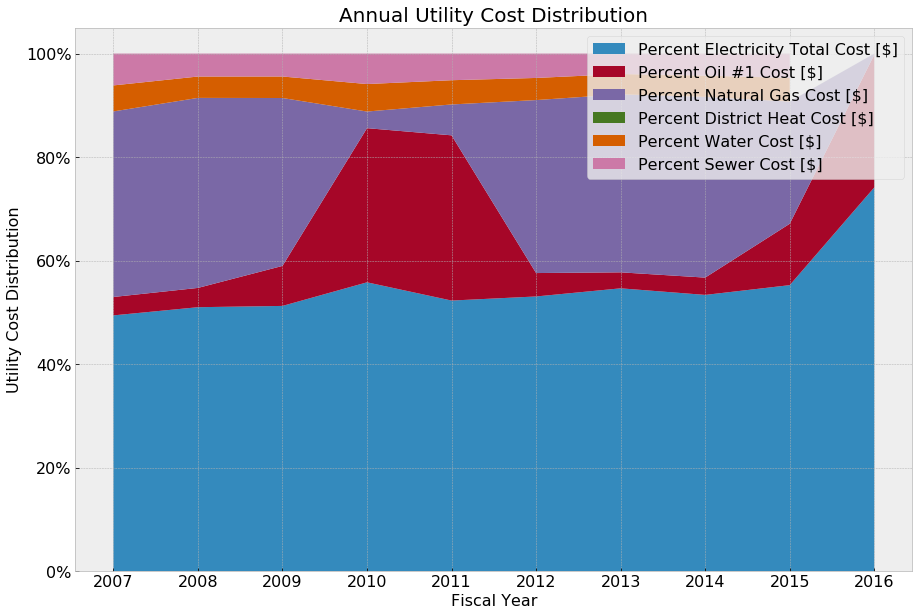

In [6]:
# Test the function
test_cols = ['Electricity Total Cost [$]', 'Oil #1 Cost [$]', 'Natural Gas Cost [$]','District Heat Cost [$]',
             'Water Cost [$]', 'Sewer Cost [$]']

area_cost_distribution(test_df, 'Fiscal Year', test_cols, "annual_utility_cost_distribution.png")

## Area Chart for Annual Energy Use Distribution Function

In [7]:
def area_use_distribution(df, fiscal_year_col, utility_col_list, filename):
    # Inputs include the dataframe, the column name for the fiscal year column, and the list of column names for the 
    # different utility bills.  The dataframe should already include the summed bills for each fiscal year.
    
    # This can be changed later if we desire
    plt.style.use('bmh')

    fig, ax = plt.subplots(figsize=[15,10])

    
    # Take usage for each utility type and convert to percent of total cost by fiscal year
    df['total_use'] = df[utility_col_list].sum(axis=1)

    percent_columns = []

    for col in utility_col_list:
        percent_col = "Percent " + col
        percent_columns.append(percent_col)
        df[percent_col] = df[col] / df.total_use

    # Create stacked area plot
    ax.stackplot(df[fiscal_year_col], df[percent_columns].T, labels=percent_columns)

    # Increase the font of the axis tick labels
    ax.tick_params(axis='both', which='both', labelsize=16)

    # Format the y axis to be in percent
    ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
    
    # Format the x-axis to include all fiscal years
    plt.xticks(np.arange(df[fiscal_year_col].min(), df[fiscal_year_col].max()+1, 1.0))

    # Add title and axis labels
    plt.title('Annual Energy Usage Distribution',fontsize=20)
    plt.ylabel('Annual Energy Usage Distribution', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=16)
    
    # Add legend 
    plt.legend(fontsize=16)
    
    plt.savefig(filename)
    plt.show()

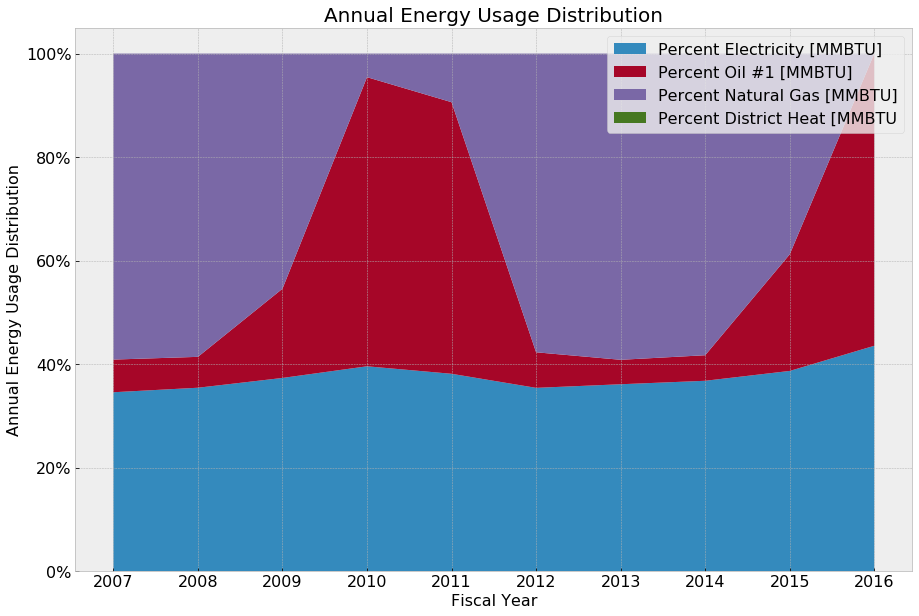

In [8]:
energy_use_cols =  ['Electricity [MMBTU]', 'Oil #1 [MMBTU]', 'Natural Gas [MMBTU]', 'District Heat [MMBTU']
area_use_distribution(test_df, 'Fiscal Year', energy_use_cols, 'annual_energy_use_distribution_chart3.png')

## Create a Stacked Bar Chart

### This still needs some work and needs to be converted to a function

In [9]:
def create_stacked_bar(df, fiscal_year_col, column_name_list, filename):
    
    # Parameters include the dataframe, the name of the column where the fiscal year is listed, a list of the column names
    # with the correct data for the chart, and the filename where the output should be saved.
    
    # Set the style
    plt.style.use('bmh')
    
    # Create the figure
    plt.figure(figsize=[15, 10])
    
    # Set the bar width
    width = 0.50
    
    
    # Create the stacked bars.  The "bottom" is the sum of all previous bars to set the starting point for the next bar.
    previous_col_name = 0
    
    for col in column_name_list:
        short_col_name = col.split(" Cost")[0]
        short_col_name = plt.bar(df[fiscal_year_col], df[col], width, label=short_col_name, bottom=previous_col_name)
        previous_col_name = previous_col_name + df[col]
      
    # label axes
    plt.ylabel('Utility Cost [$]', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=16)
    plt.title('Total Annual Utility Costs', fontsize=20)
    
    # Increase the font of the axis tick labels
    plt.tick_params(axis='both', which='both', labelsize=14)
    
    # Make one bar for each fiscal year
    plt.xticks(np.arange(df[fiscal_year_col].min(), df[fiscal_year_col].max()+1, 1.0), 
               np.sort(list(df[fiscal_year_col].unique())))
    
    # Set the yticks to go up to the total cost in increments of 100,000
    df['total_cost'] = df[column_name_list].sum(axis=1)
    plt.yticks(np.arange(0, df.total_cost.max(), 100000))
    
    plt.legend(fontsize=16)
    
    # Save and show
    plt.savefig(filename)
    plt.show()

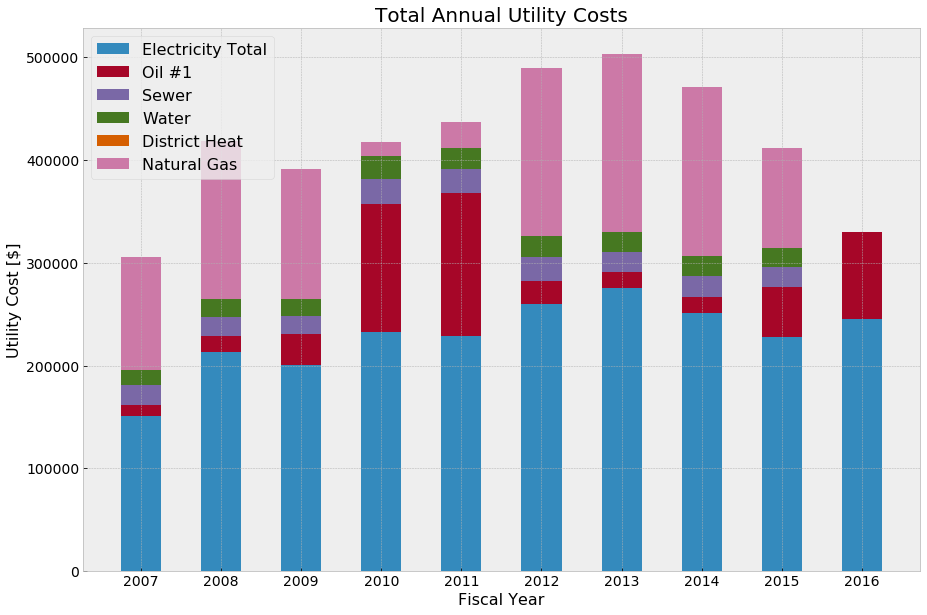

In [10]:
utility_cost_cols = ['Electricity Total Cost [$]', 'Oil #1 Cost [$]','Sewer Cost [$]','Water Cost [$]', 
                     'District Heat Cost [$]', 'Natural Gas Cost [$]']
                  
create_stacked_bar(test_df, 'Fiscal Year', utility_cost_cols, "stacked_bar_utility_costs.png")

In [11]:
def energy_use_stacked_bar(df, fiscal_year_col, column_name_list, filename):
    
    # Parameters include the dataframe, the name of the column where the fiscal year is listed, a list of the column names
    # with the correct data for the chart, and the filename where the output should be saved.
    
    # Set the style
    plt.style.use('bmh')
    
    # Create the figure
    plt.figure(figsize=[15, 10])
    
    # Set the bar width
    width = 0.50
    
    
    # Create the stacked bars.  The "bottom" is the sum of all previous bars to set the starting point for the next bar.
    previous_col_name = 0
    
    for col in column_name_list:
        short_col_name = col.split(" [MMBTU")[0]
        short_col_name = plt.bar(df[fiscal_year_col], df[col], width, label=short_col_name, bottom=previous_col_name)
        previous_col_name = previous_col_name + df[col]
      
    # label axes
    plt.ylabel('Annual Energy Usage [MMBTU]', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=16)
    plt.title('Total Annual Energy Usage', fontsize=20)
    
    # Increase the font of the axis tick labels
    plt.tick_params(axis='both', which='both', labelsize=14)
    
    # Make one bar for each fiscal year
    plt.xticks(np.arange(df[fiscal_year_col].min(), df[fiscal_year_col].max()+1, 1.0), 
               np.sort(list(df[fiscal_year_col].unique())))
    
    # Set the yticks to go up to the total usage in increments of 1,000
    df['total_use'] = df[column_name_list].sum(axis=1)
    plt.yticks(np.arange(0, df.total_use.max(), 1000))
    
    plt.legend(fontsize=16)
    
    # Save and show
    plt.savefig(filename)
    plt.show()

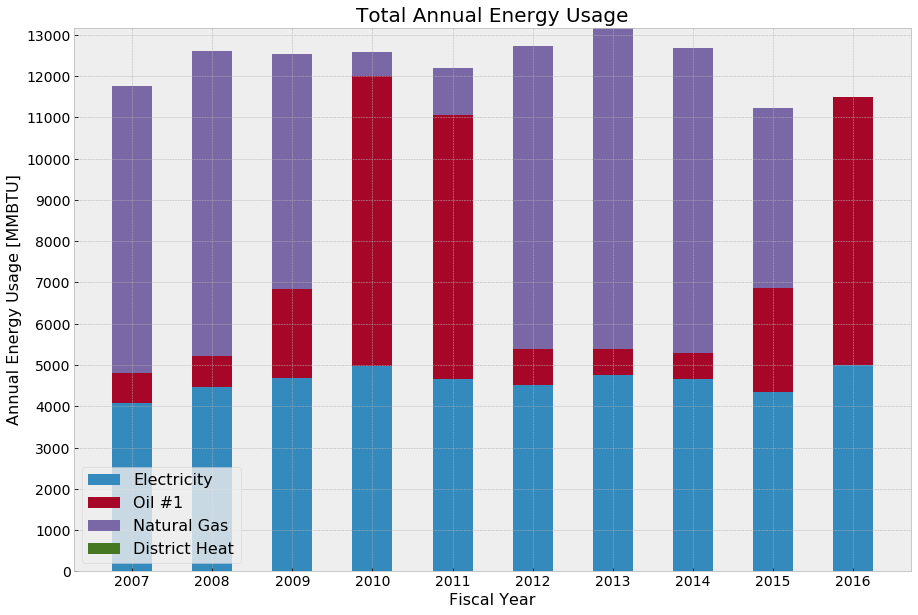

In [12]:
energy_use_cols =  ['Electricity [MMBTU]', 'Oil #1 [MMBTU]', 'Natural Gas [MMBTU]', 'District Heat [MMBTU']

energy_use_stacked_bar(test_df, 'Fiscal Year', energy_use_cols,'stacked_bar_annual_energy_usage.png')

In [13]:
test_df[['Fiscal Year', 'total_cost','Electricity Total Cost [$]', 'Oil #1 Cost [$]','Sewer Cost [$]','Water Cost [$]', 
                     'District Heat Cost [$]', 'Natural Gas Cost [$]']]

,Fiscal Year,total_cost,Electricity Total Cost [$],Oil #1 Cost [$],Sewer Cost [$],Water Cost [$],District Heat Cost [$],Natural Gas Cost [$]
0,2016,330541.776707,245104.1135,84749.01353,NaN,NaN,0,688.649677
1,2015,411237.255650,227302.3628,48756.83575,19351.44097,18736.47258,0,97090.143550
2,2014,470837.819250,251364.9614,15740.95943,19998.58271,19376.53981,0,164356.775900
3,2013,503308.154740,275100.6083,15548.68462,19848.89029,19739.86743,0,173070.104100
4,2012,489659.979170,259947.4733,22135.87078,23038.01429,20926.58000,0,163612.040800
5,2011,437214.049870,228645.9213,139534.74190,22483.81393,20473.99107,0,26075.581670
6,2010,417224.809900,232890.9354,124234.27640,24543.90607,22154.39036,0,13401.301670
7,2009,391141.390420,200500.5159,30225.69262,17312.99671,16245.73909,0,126856.446100
8,2008,417891.251450,213178.2856,15563.49614,18516.91901,17246.10120,0,153386.449500
9,2007,305649.004070,151089.5950,10863.66840,18791.39009,15352.37748,0,109551.973100


In [14]:
test_df[['Fiscal Year', 'total_use','Electricity [MMBTU]', 'Oil #1 [MMBTU]', 'Natural Gas [MMBTU]', 'District Heat [MMBTU']]

,Fiscal Year,total_use,Electricity [MMBTU],Oil #1 [MMBTU],Natural Gas [MMBTU],District Heat [MMBTU
0,2016,11488.440125,5004.786125,6483.654000,0.000000,0
1,2015,11223.516274,4343.838525,2527.799459,4351.878290,0
2,2014,12673.073805,4663.680093,625.566875,7383.826837,0
3,2013,13174.649178,4760.020802,622.359665,7792.268711,0
4,2012,12742.844766,4515.296478,875.539647,7352.008641,0
5,2011,12199.478895,4654.236557,6399.980098,1145.262240,0
6,2010,12588.342764,4984.933887,7029.895397,573.513480,0
7,2009,12543.002766,4684.724743,2161.319857,5696.958166,0
8,2008,12618.616842,4474.275020,752.736682,7391.605140,0
9,2007,11758.523413,4066.843447,742.032108,6949.647858,0


# Create Energy Usage Pie Charts

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()